In [2]:
import numpy as np
import pandas as pd
import math
from  sklearn.linear_model import LogisticRegression as LR

In [4]:
data = pd.read_csv('/Users/sampson/Documents/菜菜机器学习源/datasets/rankingcard-training.csv')
data.head(2)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [5]:
data = pd.read_csv('/Users/sampson/Documents/菜菜机器学习源/datasets/rankingcard-training.csv',index_col=0) #index_col 将第一列作为index
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
data.shape

(150000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

数据去重

In [8]:
data.drop_duplicates(inplace=True) #数据去重复

data.index=range(data.shape[0]) #索引需要恢复
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

填补缺失值

In [9]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [10]:
data.isnull().sum()/data.shape[0]
#等于 data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [11]:
#特征 Number0fDependents 的数据缺失比较少，可以利用均值填充
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [12]:
#特征 MonthlyIncome 缺失的比例很大，而且月收入这个特征是特别重要的
#尝试使用算法填补
#利用随机森领填补缺失值

def fill_missing_rf(x,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    x:要填补的特征矩阵
    y:完整的，没有缺失值的标签
    to_fill:字符串,要填补的那一列名称
    """
    #数据的整合
    #重新分割x和y
    df = x.copy()
    fillc = df.loc[:,to_fill]
    df = pd.concat([df.iloc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)

    ytrain = fillc[fillc.notnull()] #先在y中找ytrain 和 ytest，后面找x的时候可以直接用index 切片
    ytest = fillc[fillc.isnull()]
    xtrain = df.iloc[ytrain.index,:]
    xtest = df.iloc[ytest.index,:]

    #利用随机森林填补
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(xtrain,ytrain)
    ypredict = rfr.predict(xtest)

    return ypredict

将原数据处理，然后带入rf填补缺失值算法中

In [13]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
y_pred = fill_missing_rf(x,y,'MonthlyIncome')


In [14]:
y_pred.shape #原来缺失值现在已经转换成数字数据的shape

(29221,)

In [15]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

#data.loc[月收入的每行中 isnull的返回bool（bool值），月收入这一列]

In [16]:

data.loc[:,"MonthlyIncome"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
149386    False
149387    False
149388    False
149389    False
149390    False
Name: MonthlyIncome, Length: 149391, dtype: bool

In [17]:
data.info() #已经填补好了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

处理异常值

In [18]:
#描述性统计
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.493910e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,5.427947e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.322996e+04,5.136515,3.826165,1.130196,3.810523,1.101749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,4.420000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [19]:
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.946972,13229.961323,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [20]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
#查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [21]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [22]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”,“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标,在99%的分布的时候依然是2,最大值却是
98,看起来非常奇怪。一个人在过去两年内逾期35~59天98次,一年6个60天,两年内逾期98次这是怎么算出来的?
我们可以去咨询业务人员,请教他们这个逾期次数是如何计算的。如果这个指标是正常的,那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""
data.loc[data.loc[:,'NumberOfTimes90DaysLate']>90] #bool切片取索引的方法
#观察发现存在225行这样的数据，其中分类有0有1，说明是异常值可以删除
data = data[data.loc[:,'NumberOfTimes90DaysLate']<90]#删除
#恢复索引
data.index=range(data.shape[0])
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

样本不均衡问题

In [23]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [24]:
n_sample = x.shape[0]
n_sample

149165

In [33]:
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占93.38%; 0占93.38%


其中,1（判定信用不好的标签）
但是数据量十分不均衡，这部分数据太少，但是针对银行来说这部分数据才是关键。


因为大部分人都是有良好信用的.
银行关注的是这些信用不好的人。
如果这些人的样本少，会导致训练不到位

In [29]:
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
from imblearn.over_sampling import SMOTE #上采样方法
sm = SMOTE(random_state=42) #实例化
x,y = sm.fit_resample(x,y)
n_sample_ = x.shape[0]
pd.Series(y).value_counts()
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：149165; 1占50.00%; 0占50.00%


In [30]:
x.shape  #如此，我们就实现了样本平衡，样本量也增加了。

(278584, 10)

In [31]:
y.shape

(278584,)

分训练集和测试集

In [36]:
from sklearn.model_selection import train_test_split
x = pd.DataFrame(x) 
y = pd.DataFrame(y)
x_train, x_vali, Y_train, Y_vali = train_test_split(x,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, x_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
vali_data = pd.concat([Y_vali, x_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [38]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830
195004,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
195005,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793
195006,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000


In [40]:
model_data.to_csv('/Users/sampson/Documents/菜菜机器学习源/自写/model_data.csv')
vali_data.to_csv('/Users/sampson/Documents/菜菜机器学习源/自写/vali_data.csv')

分箱

In [4]:
#取出处理好的数据
model_data = pd.read_csv('/Users/sampson/Documents/菜菜机器学习源/自写/评分卡项目/model_data.csv')
vali_data = pd.read_csv('/Users/sampson/Documents/菜菜机器学习源/自写/评分卡项目/vali_data.csv')

In [5]:
#等频分箱，按着分位数分箱函数(pd.qcut)
#以其中的特征age为例子

model_data['q_cut'], updown = pd.qcut(model_data['age'],retbins=True,q=20)

"""
pd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限(updown)
"""




'\npd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化\n只能够处理一维数据。返回箱子的上限和下限\n参数q:要分箱的个数\n参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series\n现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限(updown)\n'

In [6]:
model_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,q_cut
0,0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [7]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [8]:
#统计每个分箱中0 和 1 的数量

count_y0 = model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='q_cut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='q_cut').count()['SeriousDlqin2yrs']

In [10]:
count_y0.values

array([4243, 3571, 4075, 2908, 5182, 3956, 4002, 4389, 2419, 4813, 4900,
       4728, 4681, 4677, 4483, 6583, 6968, 6623, 6753, 7737])

In [25]:
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)] #zip 会按着最短的列结合
num_bins
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数

[(21.0, 28.0, 4243, 7564),
 (28.0, 31.0, 3571, 5953),
 (31.0, 34.0, 4075, 6733),
 (34.0, 36.0, 2908, 4603),
 (36.0, 39.0, 5182, 7485),
 (39.0, 41.0, 3956, 5840),
 (41.0, 43.0, 4002, 5686),
 (43.0, 45.0, 4389, 5944),
 (45.0, 46.0, 2419, 3264),
 (46.0, 48.0, 4813, 6151),
 (48.0, 50.0, 4900, 6202),
 (50.0, 52.0, 4728, 5781),
 (52.0, 54.0, 4681, 5031),
 (54.0, 56.0, 4677, 4014),
 (56.0, 58.0, 4483, 3433),
 (58.0, 61.0, 6583, 4824),
 (61.0, 64.0, 6968, 3200),
 (64.0, 68.0, 6623, 2308),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1384)]

检查每个箱子中都有0 和 1

这个分箱案例中不需要

下一步定义 WOE 和 IV 函数

In [26]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv


卡方检验，合并箱子

利用卡方计算两两箱子的相关性，如果相关就合并箱子

In [27]:
df = get_woe(num_bins)

In [28]:
df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7564,11807,0.060546,0.640637,0.043433,0.077725,-0.581965
1,28.0,31.0,3571,5953,9524,0.048839,0.625052,0.036554,0.061171,-0.514885
2,31.0,34.0,4075,6733,10808,0.055423,0.622964,0.041713,0.069186,-0.505986
3,34.0,36.0,2908,4603,7511,0.038516,0.612835,0.029767,0.047299,-0.463078
4,36.0,39.0,5182,7485,12667,0.064956,0.590906,0.053045,0.076914,-0.371546
5,39.0,41.0,3956,5840,9796,0.050234,0.596162,0.040495,0.060010,-0.393333
6,41.0,43.0,4002,5686,9688,0.049680,0.586912,0.040966,0.058428,-0.355049
7,43.0,45.0,4389,5944,10333,0.052988,0.575244,0.044927,0.061079,-0.307117
8,45.0,46.0,2419,3264,5683,0.029142,0.574345,0.024762,0.033540,-0.303435
9,46.0,48.0,4813,6151,10964,0.056223,0.561018,0.049268,0.063206,-0.249130


In [13]:
iv = get_iv(df)
iv

0.3532309667298819

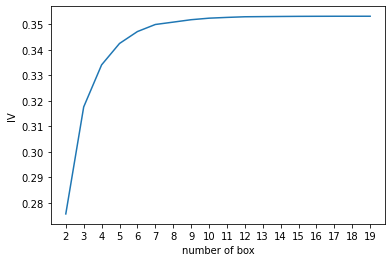

In [14]:
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy
IV = []
axisx = []
while len(num_bins_) > 2:
    pvs = []
# 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
# 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
# chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
# 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()